In [57]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
concatenated_df = pd.read_csv('concatenated_data.csv')
concatenated_df

,HCHO,Location,Current date,Next Date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02
2,0.000263,Nuwara Eliya,2019-01-01,2019-01-02
3,0.000263,Colombo,2019-01-02,2019-01-03
4,0.000006,"Deniyaya, Matara",2019-01-02,2019-01-03
...,...,...,...,...
12777,0.000158,Kurunegala,2023-12-30,2023-12-31
12778,0.000117,Jaffna,2023-12-30,2023-12-31
12779,0.000117,"Bibile, Monaragala",2023-12-31,2024-01-01
12780,0.000065,Kurunegala,2023-12-31,2024-01-01


In [59]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(concatenated_df['HCHO'])

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

# Based on the p-value, decide on stationarity
if adf_test[1] > 0.05:
    print("The series is likely non-stationary and may need differencing.")
else:
    print("The series is likely stationary.")

ADF Statistic: -11.898220
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
The series is likely stationary.


In [60]:
# Convert 'Current Date' to datetime and set as index
concatenated_df['Current date'] = pd.to_datetime(concatenated_df['Current date'])
concatenated_df.set_index('Current date', inplace=True)

# Output the first few rows and the index to verify changes
df_head_after = concatenated_df.head()
df_index_info = concatenated_df.index

df_head_after, df_index_info

(                  HCHO          Location   Next Date
 Current date                                        
 2019-01-01    0.000197           Colombo  2019-01-02
 2019-01-01    0.000197  Deniyaya, Matara  2019-01-02
 2019-01-01    0.000263      Nuwara Eliya  2019-01-02
 2019-01-02    0.000263           Colombo  2019-01-03
 2019-01-02    0.000006  Deniyaya, Matara  2019-01-03,
 DatetimeIndex(['2019-01-01', '2019-01-01', '2019-01-01', '2019-01-02',
                '2019-01-02', '2019-01-02', '2019-01-03', '2019-01-03',
                '2019-01-03', '2019-01-04',
                ...
                '2023-12-28', '2023-12-29', '2023-12-29', '2023-12-29',
                '2023-12-30', '2023-12-30', '2023-12-30', '2023-12-31',
                '2023-12-31', '2023-12-31'],
               dtype='datetime64[ns]', name='Current date', length=12782, freq=None))

In [61]:
from statsmodels.tsa.stattools import adfuller

# Running ADF test on the 'HCHO Reading' of one of the locations
result = adfuller(concatenated_df[concatenated_df['Location'] == 'Colombo']['HCHO'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -4.6439819308381285
p-value: 0.00010709010571411229


In [62]:
# Selecting the data for the model
colombo_data = concatenated_df[concatenated_df['Location'] == 'Colombo']['HCHO']

In [63]:
from statsmodels.tsa.arima.model import ARIMA


# Fit the ARIMA model
arima_model = ARIMA(colombo_data, order=(1, 0, 1))
arima_result = arima_model.fit()

# Print out the summary of the model
model_summary = arima_result.summary()

# Display the model summary
model_summary

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\l

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   HCHO   No. Observations:                 1826
Model:                 ARIMA(1, 0, 1)   Log Likelihood               14455.002
Date:                Thu, 18 Apr 2024   AIC                         -28902.003
Time:                        21:21:42   BIC                         -28879.964
Sample:                    01-01-2019   HQIC                        -28893.874
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   6.27e-06     22.743      0.000       0.000       0.000
ar.L1          0.8615   2.22e-10   3.88e+09      0.000       0.862       0.862
ma.L1         -0.5757   8.36e-11  -6.89e+09      0.000      -0.576      -0.576
sigma2      7.716e-09   2.37e-10     32.586      0.000    7.25e-09    8.18e-09
===================================================================================
Ljung-Box (L1) (Q):                   1.01   Jarque-Bera (JB):                17.73
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.71e+25. Standard errors may be unstable.
"""

In [64]:
# Forecasting the next 10 periods
forecast = arima_result.forecast(steps=10)
forecast

2024-01-01    0.000129
2024-01-02    0.000131
2024-01-03    0.000133
2024-01-04    0.000134
2024-01-05    0.000135
2024-01-06    0.000136
2024-01-07    0.000137
2024-01-08    0.000138
2024-01-09    0.000139
2024-01-10    0.000139
Freq: D, Name: predicted_mean, dtype: float64

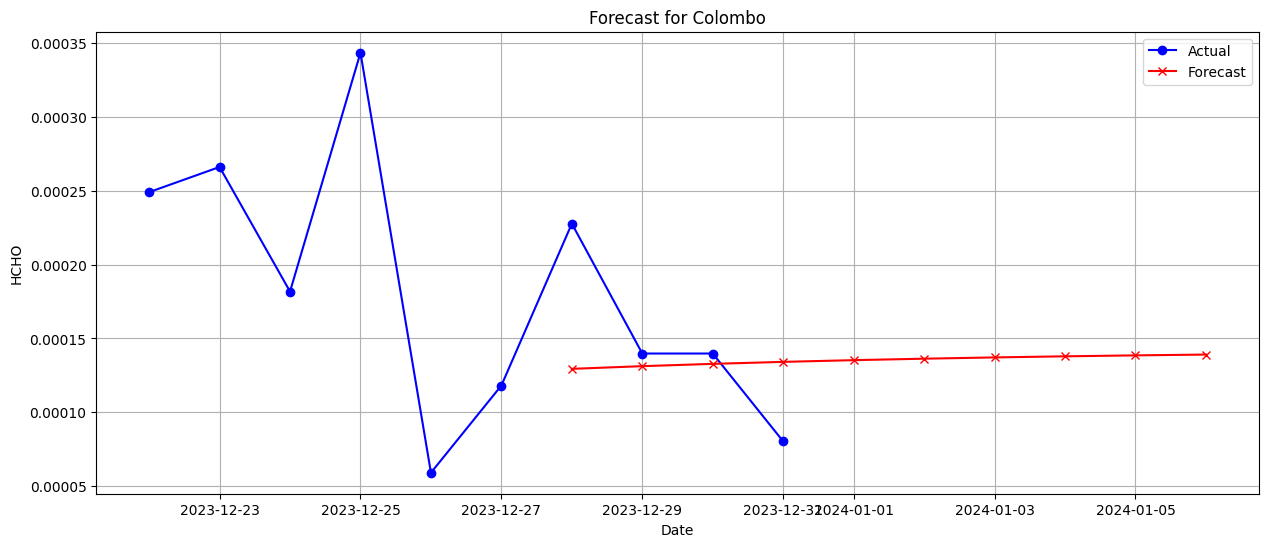

In [65]:
# Plot forecast
forecast_dates = pd.date_range(concatenated_df.index[-10], periods=10)
plt.figure(figsize=(15, 6))
plt.title(f'Forecast for Colombo')
plt.xlabel('Date')
plt.ylabel('HCHO')
plt.plot(concatenated_df[concatenated_df['Location'] == 'Colombo'].index[-10:], concatenated_df[concatenated_df['Location'] == 'Colombo']['HCHO'].values[-10:], label='Actual', marker='o', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', marker='x', color='red')
plt.legend()
plt.grid(True)
plt.show()